In [1]:
# Jupyter notebook magic to reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append(
    "../",
)  # path to the src with the functions

## Select a file + trial from the dataset


In [3]:
import pickle

# Path to the pickle file
pkl_path_1 = "../data/Data05_External_noise/gna_1.00_gk_1.00_noise_1.00/00.pkl"  # Baseline at 20X external input

# Load the pickle file
# load path 1
try:
    with open(pkl_path_1, "rb") as file:
        data = pickle.load(file)
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading the file:", e)

numprocs=1
Data loaded successfully.


## Scatter plot of all populations at baseline (20x external input -> depolarization event)


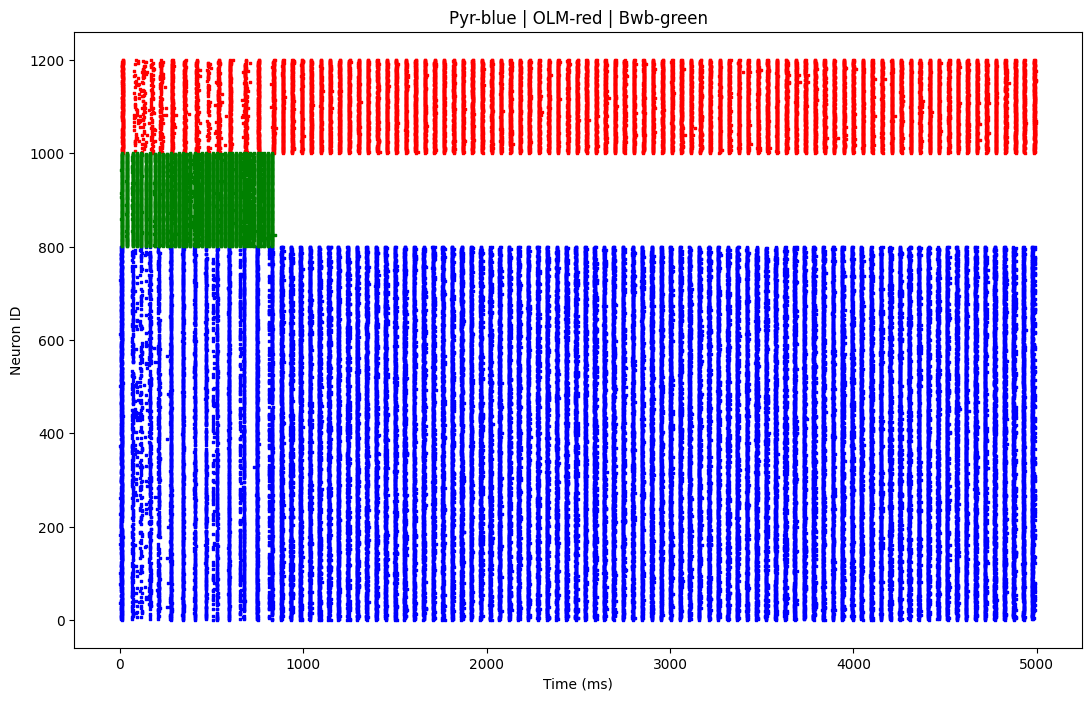

In [4]:
from src.SanjayCode import scatter_plot


scatter_plot(
    data["simData"]
)  # Pyr NA/K 1.00, noise 1.00 (20X external input increase from baseline)

## Find depolarization block


In [5]:
from src.SanjayCode import find_depolarization_block


cell_range = range(800, 1000)  # Basket cells GID range
depolarization_onset = find_depolarization_block(data["simData"], cell_range)

if depolarization_onset is not None:
    print(f"Depolarization block onset detected at {depolarization_onset} ms")
else:
    print("No depolarization block detected.")

Depolarization block onset detected at 848.6 ms


## Spike activity around depolarization onset


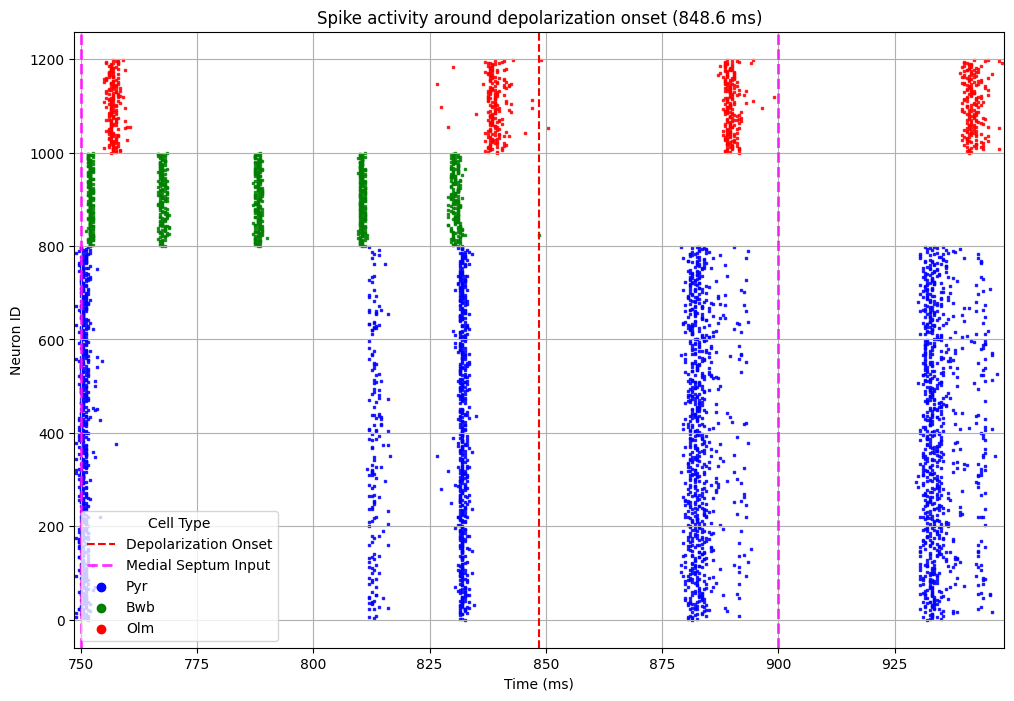

Pyr :: 17.11 Hz +- 1.40 Hz (std)
Bwb :: 7.20 Hz +- 0.51 Hz (std)
Olm :: 17.88 Hz +- 0.25 Hz (std)


In [6]:
from src.SanjayCode import plot_spike_activity_DPB
from src.SanjayCode import print_firing_rate


plot_spike_activity_DPB(
    data["simData"], depolarization_onset, show_ms_input=True
)  # Can show MS input: show_ms_input=True, default is False
print_firing_rate(data["simData"])

## Convoluted spike activity per population around depolarization onset


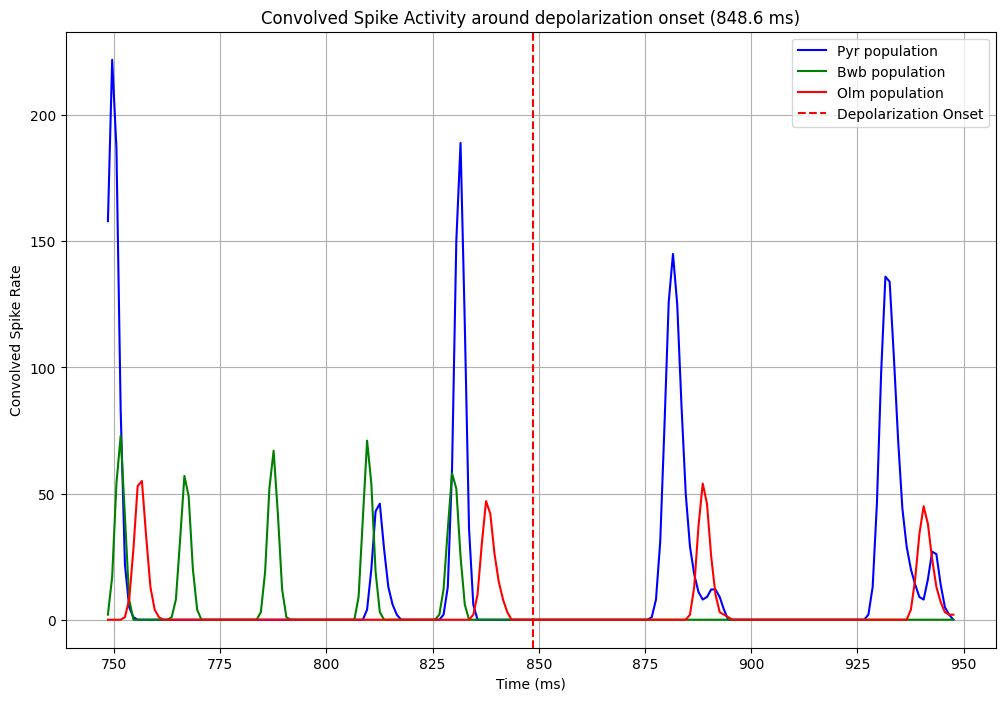

In [7]:
from src.SanjayCode import convolve_spike_activity_DPB


convolve_spike_activity_DPB(
    data["simData"], depolarization_onset, window=100, resolution=1, sigma=1
)

{0: {'mean': 52.31117021276596, 'std': 29.767867113053118, 'cv': 0.5690537411412869}, 1: {'mean': 63.70753205128205, 'std': 47.9241275827352, 'cv': 0.7522521441288633}, 2: {'mean': 59.160714285714285, 'std': 34.77116182597141, 'cv': 0.5877407371730755}, 3: {'mean': 72.05072463768116, 'std': 105.83128133104385, 'cv': 1.4688440937025096}, 4: {'mean': 54.00815217391305, 'std': 27.73360392741863, 'cv': 0.5135077356120783}, 5: {'mean': 59.8230421686747, 'std': 32.80271701446931, 'cv': 0.5483291358199414}, 6: {'mean': 70.98571428571428, 'std': 57.58546266380155, 'cv': 0.8112260789829159}, 7: {'mean': 57.12356321839081, 'std': 32.06257068651254, 'cv': 0.5612845011774417}, 8: {'mean': 62.870253164556964, 'std': 45.43768964683654, 'cv': 0.7227215950269464}, 9: {'mean': 58.40882352941176, 'std': 40.606429639007686, 'cv': 0.6952105381571385}, 10: {'mean': 71.01294642857142, 'std': 116.72422839180523, 'cv': 1.643703497209662}, 11: {'mean': 72.99632352941177, 'std': 88.13981928638442, 'cv': 1.20745

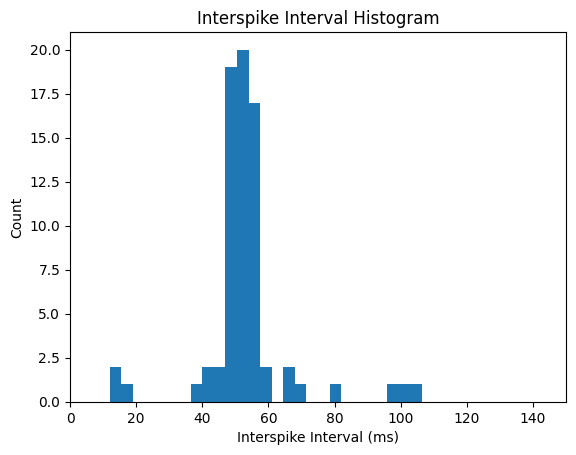

In [8]:
from src.SanjayCode import (
    get_sorted_spike_times_for_pyr_cells,
    calculate_interspike_intervals,
    calculate_isi_stats,
    plot_isi_histogram,
)


# Get the sorted spike times for Pyr cells
sorted_pyr_spikes = get_sorted_spike_times_for_pyr_cells(data)

# Calculate the interspike intervals for Pyr cells
pyr_interspike_intervals = calculate_interspike_intervals(sorted_pyr_spikes)
# print(pyr_interspike_intervals)

# Calculate the mean, standard deviation, and coefficient of variation for the interspike intervals of Pyr cells
pyr_isi_stats = calculate_isi_stats(pyr_interspike_intervals)
print(pyr_isi_stats)

# Plot the interspike interval histogram for a Pyr cell
plot_isi_histogram(pyr_interspike_intervals[1], bins=100)

In [9]:
import pandas as pd


# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(pyr_isi_stats, orient="index")

# Print the head of the DataFrame
print(df.head())

        mean         std        cv
0  52.311170   29.767867  0.569054
1  63.707532   47.924128  0.752252
2  59.160714   34.771162  0.587741
3  72.050725  105.831281  1.468844
4  54.008152   27.733604  0.513508


In [23]:
from src.SanjayCode import detect_bursts


# Detect bursts in the spike times data for selected gids
bursts_timings, pyr_bursts = detect_bursts(sorted_pyr_spikes, gid_start=0, gid_end=799)
print(pyr_bursts)

{0: [6, 7, 8, 9, 10, 276, 277, 278, 279, 280, 341, 342, 343, 344, 345, 404, 405, 406, 407, 408, 504, 505, 506, 507, 508, 526, 527, 528, 529, 530, 591, 592, 593, 594, 595, 747, 748, 749, 750, 751, 828, 829, 830, 831, 832, 877, 878, 879, 880, 881, 928, 929, 930, 931, 932, 978, 979, 980, 981, 982, 990, 991, 992, 993, 994, 1031, 1032, 1033, 1034, 1035, 1083, 1084, 1085, 1086, 1087, 1096, 1097, 1098, 1099, 1100, 1134, 1135, 1136, 1137, 1138, 1147, 1148, 1149, 1150, 1151, 1186, 1187, 1188, 1189, 1190, 1237, 1238, 1239, 1240, 1241, 1249, 1250, 1251, 1252, 1253, 1290, 1291, 1292, 1293, 1294, 1342, 1343, 1344, 1345, 1346, 1393, 1394, 1395, 1396, 1397, 1446, 1447, 1448, 1449, 1450, 1495, 1496, 1497, 1498, 1499, 1507, 1508, 1509, 1510, 1511, 1548, 1549, 1550, 1551, 1552, 1599, 1600, 1601, 1602, 1603, 1652, 1653, 1654, 1655, 1656, 1704, 1705, 1706, 1707, 1708, 1754, 1755, 1756, 1757, 1758, 1769, 1770, 1771, 1772, 1773, 1807, 1808, 1809, 1810, 1811, 1859, 1860, 1861, 1862, 1863, 1911, 1912, 1913, 1

In [24]:
print(bursts_timings)

[(0, 16), (62, 75), (80, 97), (104, 123), (135, 147), (155, 172), (202, 219), (256, 262), (268, 285), (337, 352), (401, 415), (462, 476), (503, 514), (523, 536), (588, 601), (652, 662), (667, 681), (743, 755), (808, 817), (825, 835), (875, 894), (926, 947), (977, 998), (1029, 1049), (1081, 1103), (1131, 1153), (1185, 1204), (1236, 1256), (1287, 1307), (1339, 1358), (1391, 1412), (1442, 1462), (1494, 1514), (1545, 1566), (1598, 1618), (1649, 1670), (1701, 1722), (1754, 1774), (1805, 1826), (1856, 1877), (1909, 1928), (1960, 1981), (2012, 2033), (2064, 2083), (2116, 2137), (2168, 2187), (2220, 2239), (2272, 2293), (2322, 2343), (2374, 2395), (2426, 2447), (2478, 2499), (2530, 2551), (2582, 2603), (2632, 2655), (2686, 2705), (2736, 2759), (2788, 2809), (2840, 2861), (2892, 2913), (2944, 2965), (2996, 3017), (3048, 3069), (3100, 3119), (3152, 3173), (3204, 3225), (3256, 3275), (3306, 3329), (3360, 3379), (3412, 3431), (3462, 3485), (3516, 3537), (3568, 3587), (3620, 3641), (3672, 3691), (3

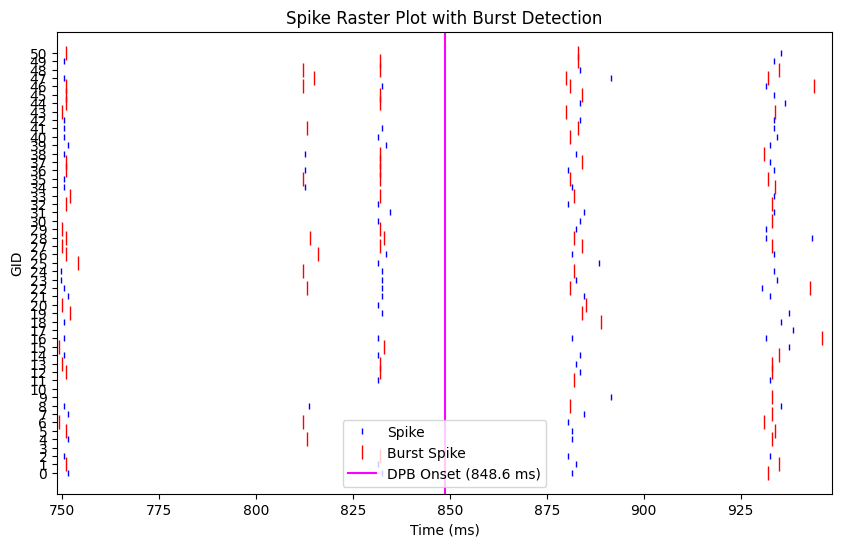

In [25]:
from src.SanjayCode import plot_raster_with_bursts


# Plot the raster plot with bursts overlay in the spike times data, includes onset of depolarization block of basket cells
plot_raster_with_bursts(
    sorted_pyr_spikes,
    pyr_bursts,
    depolarization_onset,
    gid_start=0,
    gid_end=50,
    window=100,
)

## Spiking activity around depolarization onset: Subset of cells


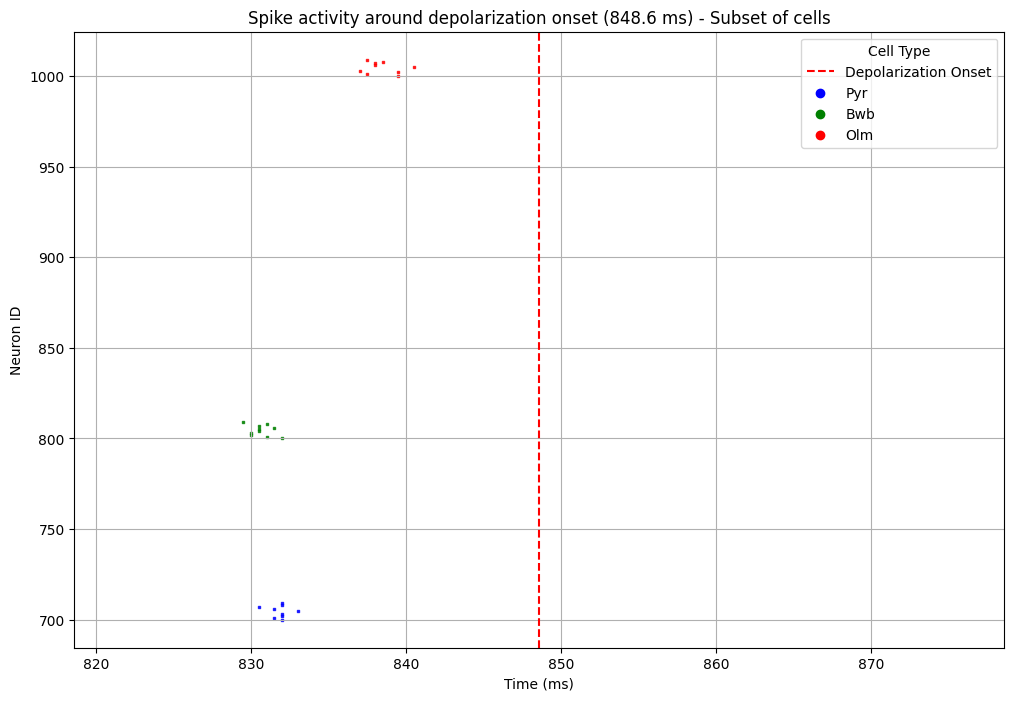

In [26]:
from src.SanjayCode import plot_spike_activity_around_block_subset


plot_spike_activity_around_block_subset(data["simData"], depolarization_onset)